In [65]:
import importlib
import model.Portfolio as Portfolio

importlib.reload(Portfolio)

<module 'model.Portfolio' from '/home/raymond/Desktop/quant/model/Portfolio.py'>

<IPython.core.display.Javascript object>

In [92]:
names = ["VUSA", "A35", "S59", "VUSD", "BAB", "IWDA", "Z74", "ES3", "VWRD"]
p = Portfolio.Portfolio()

# Add all assets
for name in names:
    p.addAsset(f"data/{name}.csv", name)

# Convert non SGD assets to SGD
p.addExchangeRate("data/forex/SGDEUR.csv", "EUR", True)
p.addExchangeRate("data/forex/USDSGD.csv", "USD", False)
p.exchangeAdjustment(0, "EUR")
p.exchangeAdjustment(3, "USD")
p.exchangeAdjustment(4, "USD")
p.exchangeAdjustment(5, "USD")
p.exchangeAdjustment(8, "USD")

<IPython.core.display.Javascript object>

In [93]:
currentWeight = [
    0.08992020522,
    0.2744348384,
    0.03070927321,
    0.01896821775,
    0.06166520726,
    0.06204753154,
    0.02053451402,
    0.3393806347,
    0.102339578,
]

p.portfolioPerformance(currentWeight)

# Sharpe Ratio: 0.9192931634423893
# Returns: 0.024426103239657028
# Volatility: 0.004814680904492993

# With Exchange
# {'returns': 0.046602380697228225,
#  'variance': 0.004724437320510276,
#  'sharpe': 9.864112387503281}

# Without Exchange
# {'returns': 0.04435666151352394,
#  'variance': 0.0048942609865242105,
#  'sharpe': 9.062994727019042}

{'returns': 0.046602380697228225,
 'variance': 0.004724437320510276,
 'sharpe': 9.864112387503281}

<IPython.core.display.Javascript object>

In [95]:
def randomWeight(length):
    w = np.random.random(length)
    w /= np.sum(w)p.portfolioPerformance(currentWeight)

    return w

<IPython.core.display.Javascript object>

In [102]:
%%time

noSimulations = 10000
rf = 0.02
simWeights = []
simRets = []
simVols = []
simSharpes = []

for i in range(noSimulations):
    weights = randomWeight(len(names))
    perf = p.portfolioPerformance(weights)

    simWeights.append(weights)
    simRets.append(perf["returns"])
    simVols.append(perf["variance"])
    simSharpes.append(perf["sharpe"])

CPU times: user 40.4 s, sys: 0 ns, total: 40.4 s
Wall time: 40.4 s


<IPython.core.display.Javascript object>

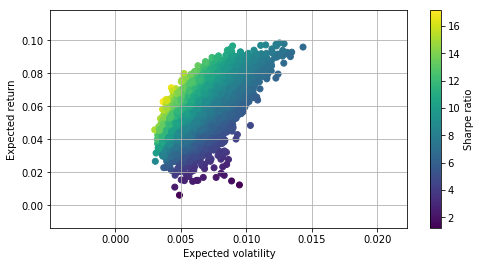

<IPython.core.display.Javascript object>

In [103]:
plt.figure(figsize=(8, 4))
plt.scatter(simVols, simRets, c=simSharpes, marker="o")
plt.grid(True)
plt.xlabel("Expected volatility")
plt.ylabel("Expected return")
plt.colorbar(label="Sharpe ratio")
plt.show()

In [104]:
# Get top 10 portfolio with highest sharpe
sortedIndices = np.argsort(simSharpes)[-10:]

results = []
for x in sortedIndices:
    results.append(np.insert(simWeights[x], 0, [simSharpes[x], simRets[x], simVols[x]]))
pd.DataFrame(results, columns=["SharpeRatio", "Returns", "Volatility"] + stockNames)

,SharpeRatio,Returns,Volatility,VUSA,A35,S59,VUSD,BAB,IWDA,Z74,ES3,VWRD
0,15.435338,0.064455,0.004176,0.112581,0.194781,0.029401,0.047220,0.228883,0.168001,0.054494,0.130669,0.033972
1,15.534383,0.068723,0.004424,0.170687,0.148176,0.060925,0.159413,0.309559,0.012244,0.053757,0.025386,0.059852
2,15.604636,0.062358,0.003996,0.177439,0.188734,0.001499,0.093193,0.226969,0.029454,0.025715,0.252826,0.004169
3,15.789378,0.069499,0.004402,0.228748,0.242307,0.000701,0.056478,0.269518,0.002800,0.007484,0.059306,0.132659
4,15.852745,0.061495,0.003879,0.059979,0.139105,0.032275,0.083884,0.296281,0.072690,0.019211,0.217123,0.079452
5,16.031860,0.063555,0.003964,0.054006,0.264406,0.028904,0.183566,0.270938,0.015658,0.072454,0.030269,0.079800
6,16.083607,0.058201,0.003619,0.007798,0.213219,0.060554,0.042889,0.332144,0.163591,0.099388,0.009459,0.070958
7,16.488021,0.064183,0.003893,0.045587,0.313483,0.003276,0.113669,0.271430,0.096990,0.061476,0.026056,0.068035
8,16.618602,0.071257,0.004288,0.252367,0.063059,0.002093,0.042523,0.369000,0.024559,0.097586,0.119000,0.029813
9,17.155166,0.062800,0.003661,0.227648,0.257956,0.031952,0.016675,0.275294,0.080281,0.036320,0.038860,0.035015


<IPython.core.display.Javascript object>